## Libraries and Definitions

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sns.set(style="darkgrid", context="talk")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
plt.style.use("dark_background")

## Data Exploration

In [4]:
file_path = 'data/conversation_nps.csv'

Fix JSON and CSV filenames

In [5]:
import os
path = 'data/'
separator = '__'
items = [ name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]

In [6]:
for i in items:
    path_to_items = path + i + '/'
    files = os.listdir(path_to_items)
    for filename in files:
        os.rename(path_to_items + filename, path_to_items + filename.replace('1_conversation_', '').split(separator,1)[0] + '.' + i)

Now we have all items with the same id pattern

In [7]:
for i in items:
    path_to_items = path + i + '/'
    files = os.listdir(path_to_items)
    #print(files)

In [8]:
df = pd.read_csv(file_path, header=None, usecols=[0,1], delimiter=';')
df = df.rename(columns={0: 'id', 1: 'rating'})

In [9]:
path_to_items

'data/output/'

In [10]:
vals = df.id.unique()
result = []
for root, dir, files in os.walk(path_to_items):
    for i in vals:
        if any(i in f for f in files):
            result.append(i)

In [11]:
len(result)

0

We have 988 files loaded in df that contains a phone register

In [12]:
df

,id,rating
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0
1,265f3b20-d426-4bcc-b46d-375b0e920532,5.0
2,26614192-7d2d-4518-b315-c0ca74014461,5.0
3,266580c7-5f96-428b-bfc9-1749a490cf35,5.0
4,26670455-d46e-4a03-9e70-1560992ff04f,NaN
...,...,...
996,3f333e1f-67b5-48db-9112-1fd036f952c8,NaN
997,3f363ffb-ce63-439c-a3dd-0458f25476b7,NaN
998,3f41cbb4-3d15-4134-8eac-97506e2cf340,NaN
999,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0


In [13]:
df.rating.value_counts()

5.0    272
4.0     19
1.0      9
3.0      4
2.0      2
Name: rating, dtype: int64

Merging CSV Files

In [14]:
path_to_csv = path + 'csv/'
path_to_csv

'data/csv/'

In [15]:
csv_files = os.listdir(path_to_csv)

In [16]:
filtered = []

for f in csv_files:
    data = pd.read_csv(
        path_to_csv + f,
        index_col=[0]
    )
    data['id'] = f.replace('.csv', '')
    filtered.append(data)

In [17]:
concated = pd.concat(filtered, ignore_index=True)

In [18]:
df.sample(3)

,id,rating
445,316aef5c-3da7-4a53-948a-076c8454fe66,NaN
829,3b03d9d8-1fde-49ac-83ef-63d1e58d54db,5.0
930,3d5e01fc-d84f-4d0b-a1c3-7d58d4431499,NaN


In [19]:
concated.sample(3)

,start_time,end_time,speaker,comment,id
29963,0:18:36,0:18:37,ch_1,desculpa é #### número #### e o #### ou é duas...,3100a031-76bb-41f3-95ca-5be46fe20496
16191,0:13:32,0:13:32,ch_0,é porque eu não sei. Eu até posso falar com o ...,2bf1e70e-de7e-4fe4-807f-db88d55a4e44
1269,0:01:58,0:01:58,ch_0,"Ah, então tá sim, pode! Pode me dizer o número",26e39d7e-ba66-44af-8346-23e806e8e97b


In [20]:
inner_df = pd.merge(df, concated, how='inner', on='id')

In [21]:
inner_df

,id,rating,start_time,end_time,speaker,comment
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:01,0:00:01,ch_1,sua chamada será encaminhada para ## de nossos...
1,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:12,0:00:13,ch_0,bom dia! Meu nome é #######
2,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:14,0:00:14,ch_1,tudo bem. ######! Como eu posso te ajudar?
3,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:18,0:00:19,ch_0,"O cartão, esse cartão ou conta jurídica? Ele t..."
4,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:31,0:00:31,ch_1,É Vamos dar uma olhadinha. Qual é o teu CPF?
...,...,...,...,...,...,...
68755,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:04,0:27:04,ch_1,##### e #### ###### ####.
68756,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:06,0:27:07,ch_0,##### e #### ###### Muito obrigado pela sua at...
68757,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:08,0:27:10,ch_1,Eu que agradeço se puder no final ## ligação. ...
68758,3f59dd32-bd7c-47ed-a8ac-59af63a43a66,5.0,0:27:16,0:27:16,ch_0,"Tá, pode deixar que vou avaliá Muito obrigada,..."


## General NPS Analysis

In all dataset we just have 306 not-null values for nps-rating

In [22]:
df.rating.value_counts().sum()

306

In [23]:
inner_df.groupby('id').rating.first().value_counts().sum()

305

We have A LOT of 5 stars rating for our customer service

In [90]:
exp = df.copy()
exp2 = exp.copy()

In [91]:
exp.rating = exp.rating.fillna('No Review')
exp2.dropna(subset='rating', inplace=True)

In [78]:
exp.sample(5)

,id,rating
742,38840a79-eff9-45e2-a958-fa5d6b4e0b8b,5.0
583,34a41f58-91aa-4a32-972f-c18d96dfa16d,No Review
456,31ae3027-a760-4f5f-ba2d-6e1093595e0d,5.0
834,3b25273a-173e-4f03-b032-ef26e0bae0af,No Review
480,325795bf-5f67-4b10-94ff-41efac63cf1e,No Review


Text(0.5, 1.0, 'Customers vs Rating')

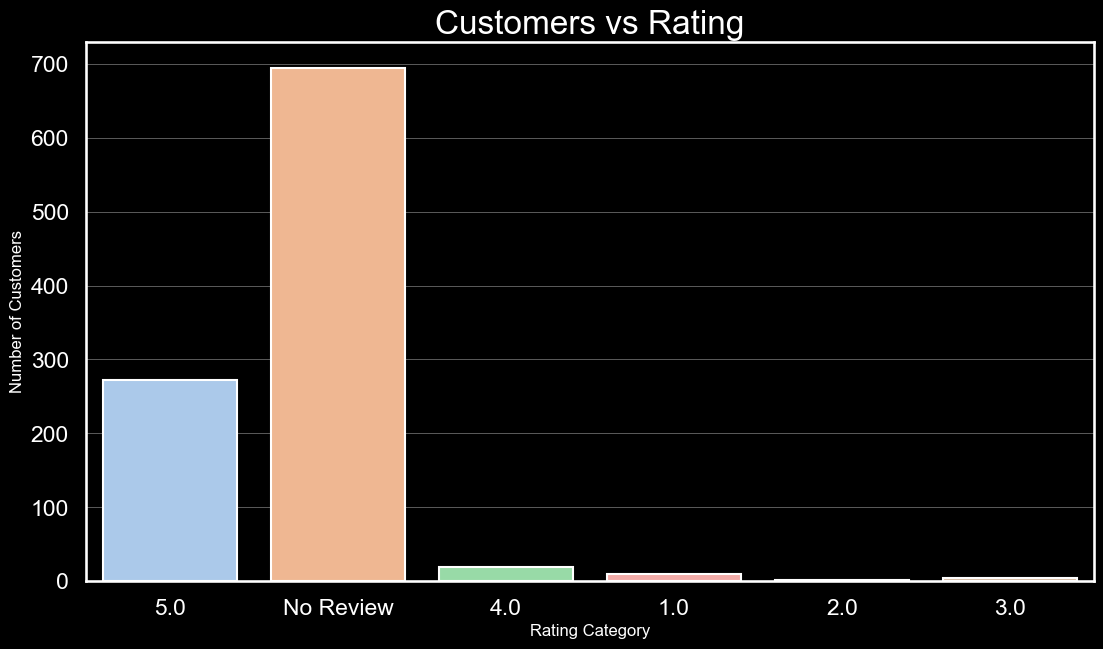

In [79]:
fig, ax = plt.subplots(figsize = (13,7))
sns.countplot(x='rating', data=exp, palette="pastel")
ax.set_xlabel( "Rating Category" , size = 12)
ax.set_ylabel( "Number of Customers" , size = 12)
ax.set_title( "Customers vs Rating" , size = 24 )

In [80]:
new_rating = []
for row in exp['rating']:
    
    if row == 'No Review':
        new_rating.append('No Review')
    elif row < 5.0:
        new_rating.append('Others')
    else:
        new_rating.append(5.0)
        
exp['unbalanced_rating'] = new_rating

In [81]:
exp.unbalanced_rating.value_counts()

No Review    695
5.0          272
Others        34
Name: unbalanced_rating, dtype: int64

Text(0.5, 1.0, 'Customers vs Rating Classification')

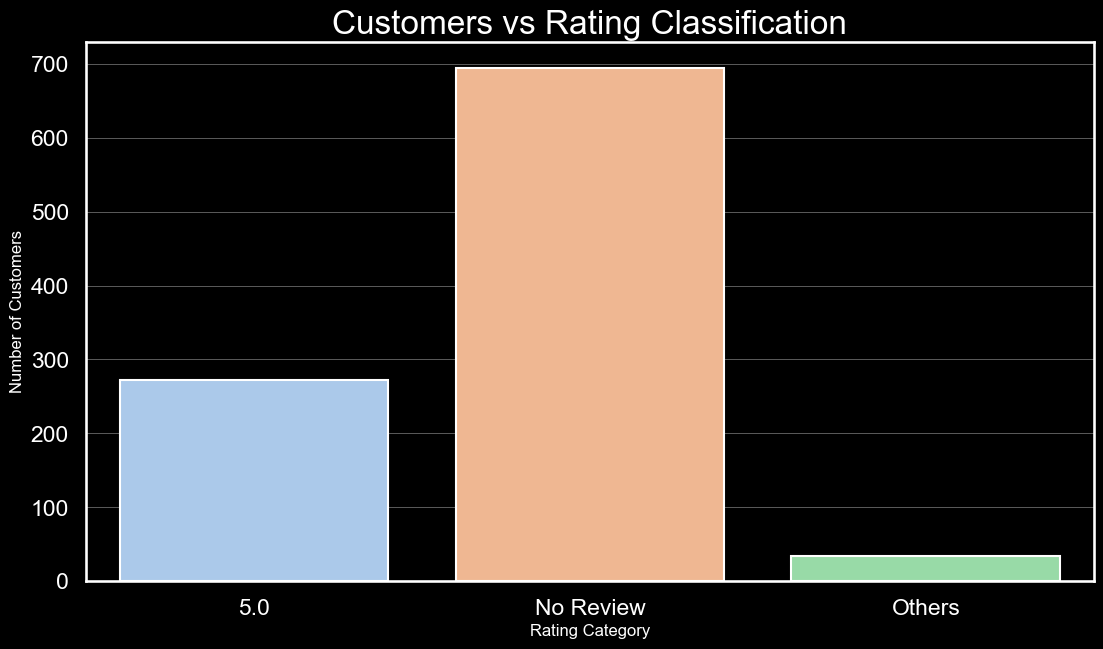

In [82]:
fig, ax = plt.subplots(figsize = (13,7))
sns.countplot(x='unbalanced_rating', data=exp, palette="pastel")
ax.set_xlabel( "Rating Category" , size = 12)
ax.set_ylabel( "Number of Customers" , size = 12)
ax.set_title( "Customers vs Rating Classification" , size = 24 )

In [93]:
nps_rating = []
for row in exp2['rating']:
    if (row >= 4.0):
        nps_rating.append('Promoters')
    elif (row >= 3.0):
        nps_rating.append('Passive')
    else:
        nps_rating.append('Detractors')
exp2['nps_rating'] = nps_rating

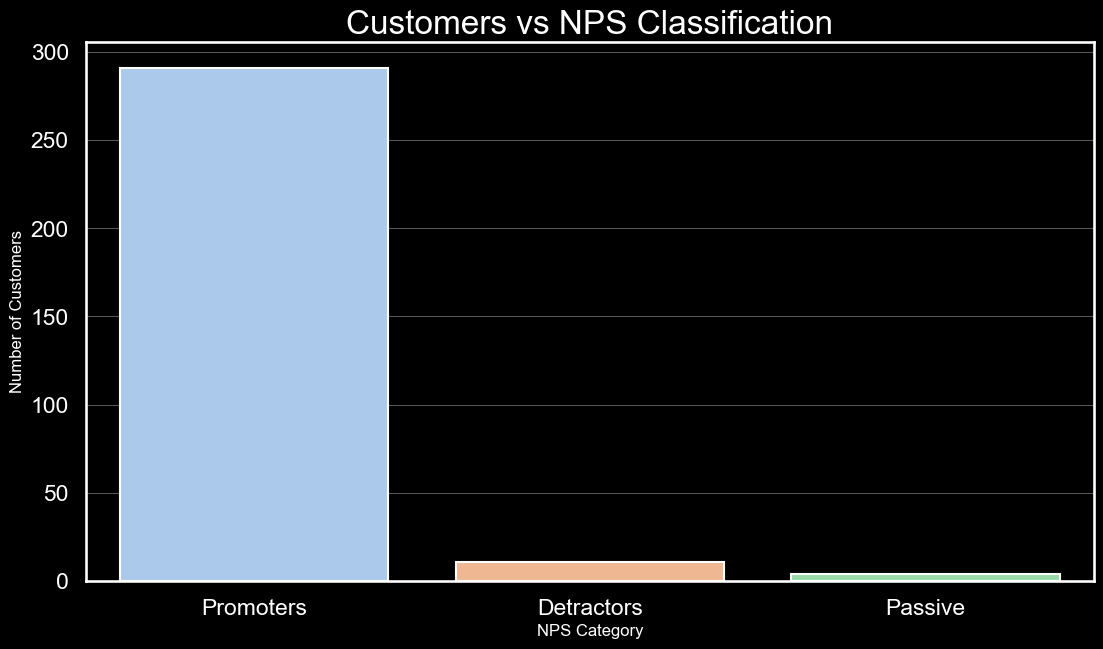

In [94]:
fig, ax = plt.subplots(figsize = (13,7))
sns.countplot(x='nps_rating', data=exp2, palette="pastel")
ax.set_xlabel( "NPS Category" , size = 12)
ax.set_ylabel( "Number of Customers" , size = 12)
ax.set_title( "Customers vs NPS Classification" , size = 24 )
plt.show()


In [95]:
inner_df.isna().sum()

id                0
rating        45923
start_time        0
end_time          0
speaker           0
comment           0
dtype: int64

In [33]:
agg_funcs = {'rating' : 'first',
            'comment' : 'size', 
            'end_time': 'last' }

In [98]:
relation_rating_comment = inner_df.groupby('id').agg(agg_funcs).reset_index().rename(columns={'comment': 'number_comments', 'end_time': 'minutes'})
relation_rating_comment.minutes = pd.to_datetime(relation_rating_comment.minutes, format='%H:%M:%S').dt.minute

In [101]:
relation_rating_comment.isna().sum()

id                   0
rating             683
number_comments      0
minutes              0
dtype: int64

In [102]:
relation_rating_comment.rating.fillna('No Review', inplace=True)

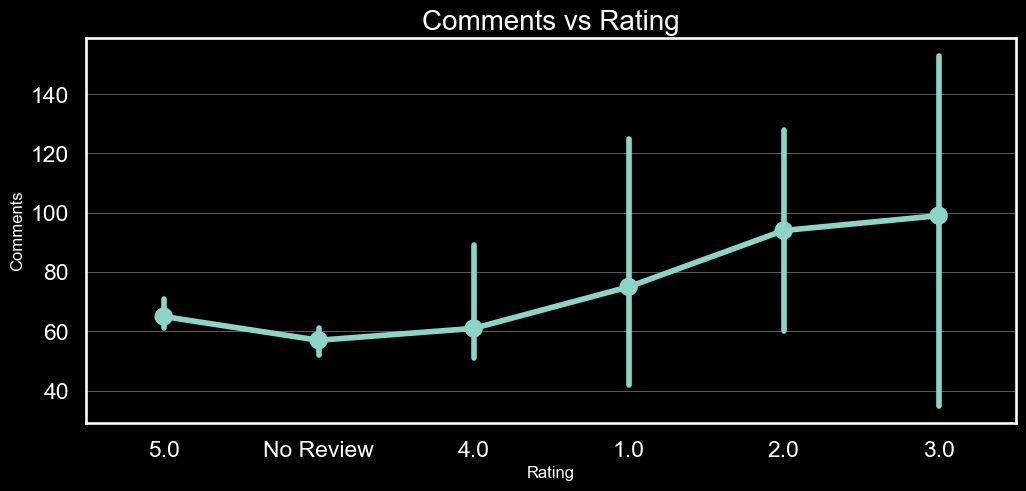

In [103]:
fig, ax = plt.subplots(figsize = (12,5))
sns.pointplot(data=relation_rating_comment, x='rating', y='number_comments', estimator='median')
ax.set_ylabel( "Comments" , size = 12)
ax.set_xlabel( "Rating" , size = 12)
ax.set_title( "Comments vs Rating" , size = 20 )
plt.show()

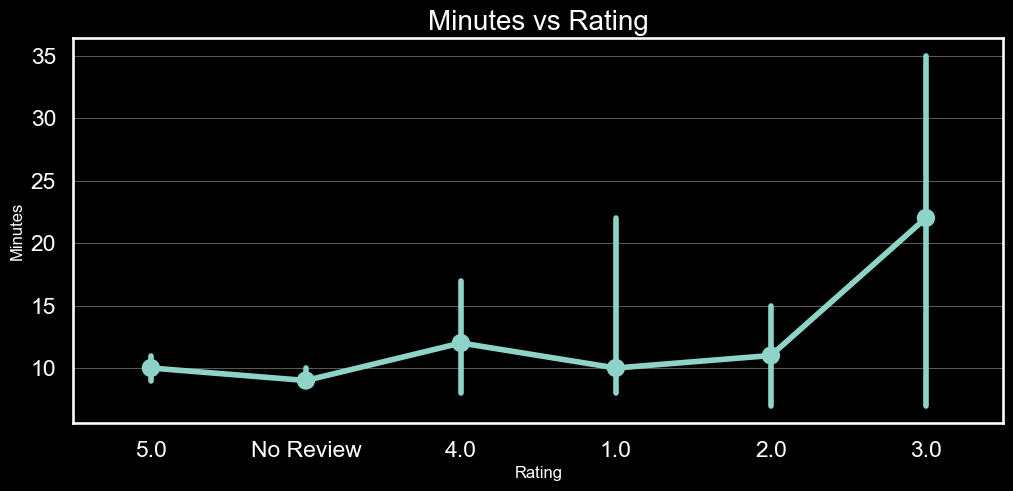

In [104]:
fig, ax = plt.subplots(figsize = (12,5))
sns.pointplot(data=relation_rating_comment, x='rating', y='minutes', estimator='median')
ax.set_ylabel( "Minutes" , size = 12)
ax.set_xlabel( "Rating" , size = 12)
ax.set_title( "Minutes vs Rating" , size = 20 )
plt.show()

In [38]:
inner_df[inner_df.id == '265e5551-7fc3-40d4-b4e5-18e15b1f714b']

,id,rating,start_time,end_time,speaker,comment
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:01,0:00:01,ch_1,sua chamada será encaminhada para ## de nossos...
1,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:12,0:00:13,ch_0,bom dia! Meu nome é #######
2,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:14,0:00:14,ch_1,tudo bem. ######! Como eu posso te ajudar?
3,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:18,0:00:19,ch_0,"O cartão, esse cartão ou conta jurídica? Ele t..."
4,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:00:31,0:00:31,ch_1,É Vamos dar uma olhadinha. Qual é o teu CPF?
...,...,...,...,...,...,...
80,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:10:58,0:10:58,ch_1,"Então, tá, Se tu puder aguardar pra avaliar o ..."
81,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:03,0:11:04,ch_0,tá jóia Brigada
82,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:04,0:11:05,ch_1,Obrigada. Tchau. Tchau
83,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:06,0:11:07,ch_0,Tchau


## NLP Analysis

In [112]:
import nltk
#nltk.download('stopwords')
from collections import Counter
import re
from nltk import ngrams

In [40]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [107]:
extra_list = ['t','pra','a','aqui','ento', 'no', 'eu', 'carto', 'n']
stopwords.append(extra_list)

In [41]:
import re
def clean_text(data, column):
    data[column] = data[column].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)])\
        .lower().encode('ascii', errors='ignore').decode('utf-8'))
    data[column] = data[column].apply(lambda x: re.sub('\W+',' ', x)) 
    return data

In [114]:
def return_most_common(df, n_words, column, n_gram):
    all_text = [' '.join(df[column])]
    output_words = all_text[0].split()
    ctr = Counter(ngrams(output_words, n_gram))
    most_occur = ctr.most_common(n_words)
    return most_occur

98% of our conversation_id has actual data of comments and time 

In [43]:
len(inner_df.id.unique())/len(df)

0.987012987012987

Here we have all ratings with minutes of call and all customer comments in a string

In [44]:
sentiment_df = inner_df.query("speaker == 'ch_0'").drop(columns=['start_time']).rename(columns={'end_time' : 'duration'})
g = sentiment_df.groupby('id')
sentiment_df.duration = (g['duration'].transform('last'))
sentiment_df['minutes'] = pd.to_datetime(sentiment_df.duration, format='%H:%M:%S').dt.minute
sentiment_df.drop(columns=['duration'], inplace=True)

sentiment_df = sentiment_df.groupby('id').tail(10)

sentiment_df = sentiment_df.groupby('id').agg({'rating' : 'first',
                                'speaker': 'first',
                                'comment': ' '.join,
                                 'minutes': 'first' }).reset_index()
sentiment_df = clean_text(sentiment_df, 'comment')


sentiment_df

,id,rating,speaker,comment,minutes
0,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,ch_0,senha ah sim u pode falar t u sim u ento t jia...,11
1,265f3b20-d426-4bcc-b46d-375b0e920532,5.0,ch_0,sim t deixa perguntar outra coisa vai nmero c...,9
2,26614192-7d2d-4518-b315-c0ca74014461,5.0,ch_0,diminui valor parcela okay agradecer a caso ac...,11
3,266580c7-5f96-428b-bfc9-1749a490cf35,5.0,ch_0,queria saber detalhes caso fazer lance n cont...,4
4,26670455-d46e-4a03-9e70-1560992ff04f,NaN,ch_0,isso crdito carto n que dinheiro meu u existe ...,11
...,...,...,...,...,...
973,3f327a25-e87d-4c61-9327-9aa9f35a6ce7,4.0,ch_0,voc telefone isso t okay nome t jia eu fico ag...,16
974,3f333e1f-67b5-48db-9112-1fd036f952c8,NaN,ch_0,resumindo consegue fazer nada bloqueei meu car...,48
975,3f363ffb-ce63-439c-a3dd-0458f25476b7,NaN,ch_0,ah t obrigado hum faz assim pode conta poupana...,18
976,3f41cbb4-3d15-4134-8eac-97506e2cf340,NaN,ch_0,acha vou vou pra l mobi porque servio l lavour...,15


<AxesSubplot: >

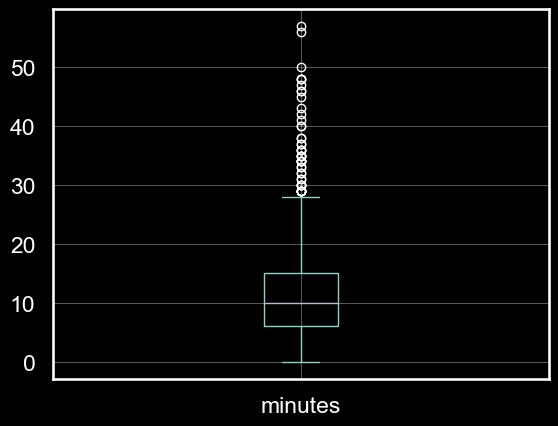

In [45]:
sentiment_df.minutes.plot(kind='box')

Sorting our dataset by comment len

In [46]:
sentiment_df['len'] = sentiment_df['comment'].str.len() 
sentiment_df = sentiment_df.sort_values(['len'], ascending=True)
sentiment_df = sentiment_df.query("len > 5").query("minutes >= 1")
sentiment_df.head(3)

,id,rating,speaker,comment,minutes,len
650,36a651ee-cd6d-49cf-a849-7eb661e3d8a2,NaN,ch_0,al al al,6,9
248,2ca33a2a-ab95-469b-b0c7-139564891653,NaN,ch_0,t entendeu,1,11
306,2e63c84f-6c1f-4a15-a2b2-4a0aa2cfab4c,NaN,ch_0,ai desgraa,2,12


Checking for Gramatical Errors

In [47]:
sentiment_df.comment.sample(5)

966    sim boa tarde fala t certo amigo eu fiz agenda...
417    consegui desbloquear outros cartes aparecer db...
592    deixa ver minutinho ah sim t certo t bom obrig...
549    no precisa no eu fiz portabilidade pixel pixel...
108     quiser obrigado t anunciando aqui minutinho s...
Name: comment, dtype: object

Tokenization

In [48]:
from gensim.parsing.porter import PorterStemmer
from gensim.utils import simple_preprocess

sentiment_df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in sentiment_df['comment']] 

In [49]:
sentiment_df

,id,rating,speaker,comment,minutes,len,tokenized_text
650,36a651ee-cd6d-49cf-a849-7eb661e3d8a2,NaN,ch_0,al al al,6,9,"[al, al, al]"
248,2ca33a2a-ab95-469b-b0c7-139564891653,NaN,ch_0,t entendeu,1,11,[entendeu]
306,2e63c84f-6c1f-4a15-a2b2-4a0aa2cfab4c,NaN,ch_0,ai desgraa,2,12,"[ai, desgraa]"
927,3e0230ea-a9d8-4a57-a2aa-993753943927,NaN,ch_0,boa noite boa noite,2,20,"[boa, noite, boa, noite]"
322,2ea8ad9e-1dac-4d89-a17a-4f2c90b20a22,NaN,ch_0,foi t certo certo pode,4,23,"[foi, certo, certo, pode]"
...,...,...,...,...,...,...,...
430,314cdcdc-ab58-4e5e-a307-71ff78e383dd,5.0,ch_0,pois t vendo t dando t dando t dando exatament...,22,1638,"[pois, vendo, dando, dando, dando, exatamente,..."
229,2c22d9b8-751d-472b-a48a-7dba4944da5c,NaN,ch_0,t entendendo ver alterar horrio entendendo a b...,11,1646,"[entendendo, ver, alterar, horrio, entendendo,..."
79,282f055d-33b3-4aa8-a213-17f71e5dd564,NaN,ch_0,entendeu s assim vanice esperaria prxima respo...,48,1766,"[entendeu, assim, vanice, esperaria, prxima, r..."
614,35c1650e-eaa5-4c62-a9f3-ae5d653f5a66,NaN,ch_0,eu quero ter tem ter nmero sorteio eu conferir...,13,1924,"[eu, quero, ter, tem, ter, nmero, sorteio, eu,..."


### Using Word2Vec

In [50]:
from gensim.models import Word2Vec
import time

In [51]:
size = 100
window = 4
min_count = 1
sg = 0

In [52]:
OUTPUT_PATH = 'output/'

In [53]:
word2vec_model_file = OUTPUT_PATH + 'word2vec_' + str(size) + '.model'
start_time = time.time()
tokenized = pd.Series(sentiment_df['tokenized_text']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(tokenized , min_count = min_count,  window = window, sg = sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
w2v_model.save('word2vec_.model')

Time taken to train word2vec model: 0.14636445045471191


Generating a csv file encoded with Word2Vec

In [54]:
train_df

NameError: name 'train_df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df = sentiment_df[~sentiment_df.rating.isna()]
X = train_df.iloc[ :, 4:6]
y = train_df.rating.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42 )
validation_df = sentiment_df[sentiment_df.rating.isna()]

In [ ]:
y_train

array([5., 5., 5., 5., 5., 1., 5., 5., 5., 5., 5., 4., 5., 5., 5., 4., 5.,
       5., 5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 4., 5., 5., 4., 5., 5.,
       5., 5., 4., 5., 5., 1., 4., 3., 5., 5., 5., 1., 1., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 2., 5., 4., 5., 5., 2., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 1., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4.,
       5., 5., 5., 5., 3., 5., 5., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 4., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 4., 5., 5., 5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

In [ ]:
word2vec_filename = 'train_review_word2vec.csv'
word2vec_filename

'train_review_word2vec.csv'

In [ ]:
w2v_model.wv[0]

array([-3.78870927e-02,  4.96748000e-01, -8.13546404e-02,  1.01547882e-01,
        1.04021456e-03, -6.48142338e-01,  2.61507690e-01,  1.07613647e+00,
       -4.32356596e-01, -2.85059988e-01, -1.85660675e-01, -7.78895497e-01,
       -4.30283919e-02,  2.39418089e-01,  5.11148386e-02, -3.74349952e-01,
        3.92411679e-01, -4.37225223e-01,  3.28598656e-02, -1.00378585e+00,
        3.33530575e-01,  2.29152024e-01,  3.61594707e-01, -2.57111102e-01,
       -1.06957950e-01, -1.36817783e-01, -3.54277164e-01, -8.26237798e-02,
       -5.23542106e-01,  4.82788570e-02,  5.19354284e-01, -1.33582324e-01,
        2.37425819e-01, -6.20735407e-01, -3.02030921e-01,  4.43900198e-01,
        2.37895936e-01, -2.90323228e-01, -3.29508483e-01, -7.62672663e-01,
       -9.10154805e-02, -4.04000819e-01, -1.73094124e-01, -1.66086197e-01,
        4.59817201e-01, -4.93484199e-01, -3.19152921e-01, -1.73858151e-01,
        2.64698565e-01,  5.39133787e-01,  1.26276881e-01, -4.26939577e-01,
       -1.22087806e-01, -

In [ ]:
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([w2v_model.wv[token] for token in row['tokenized_text']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

Training the Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
word2vec_df = pd.read_csv(word2vec_filename, on_bad_lines='skip', header=None)

In [ ]:
word2vec_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.022668,0.379893,-0.031711,-0.006952,0.072488,-0.517230,0.143644,0.787028,-0.309155,-0.209407,...,0.557417,0.265097,0.025805,0.033108,0.477271,0.375044,0.219378,-0.328598,0.051790,-0.116472
1,-0.021377,0.380650,-0.033799,0.008511,0.055713,-0.503260,0.149666,0.784577,-0.311338,-0.201504,...,0.549092,0.256837,0.014864,0.020641,0.474756,0.359317,0.216273,-0.319196,0.058398,-0.112670
2,-0.025666,0.427940,-0.032132,-0.013167,0.085499,-0.581332,0.157314,0.884786,-0.348743,-0.229851,...,0.630008,0.299127,0.036255,0.038755,0.537943,0.426671,0.251310,-0.369132,0.057499,-0.133255
3,-0.020243,0.342564,-0.022693,-0.013499,0.068834,-0.468733,0.124935,0.708177,-0.279898,-0.183758,...,0.506606,0.241593,0.029281,0.034338,0.427689,0.344646,0.202213,-0.296523,0.042707,-0.105278
4,-0.020957,0.382200,-0.035113,-0.000457,0.066698,-0.515257,0.150408,0.793494,-0.311884,-0.209114,...,0.559571,0.264481,0.025745,0.028276,0.483129,0.370630,0.223074,-0.327294,0.056749,-0.117382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,-0.026707,0.391533,-0.045328,0.022643,0.050601,-0.517923,0.166535,0.817188,-0.326894,-0.212863,...,0.562385,0.263687,0.011358,0.013695,0.498673,0.360576,0.224447,-0.332419,0.071803,-0.117439
270,-0.037770,0.480366,-0.053947,0.030446,0.049678,-0.634990,0.214275,1.013306,-0.401252,-0.266920,...,0.700058,0.323449,0.007685,-0.004232,0.615384,0.436244,0.277103,-0.401826,0.090456,-0.137816
271,-0.018615,0.330613,-0.044735,0.022263,0.035718,-0.436994,0.143944,0.691336,-0.272764,-0.180742,...,0.472789,0.221626,0.005405,0.005838,0.422020,0.293563,0.187363,-0.278285,0.063978,-0.098943
272,-0.020560,0.341047,-0.027641,-0.001196,0.063196,-0.459479,0.131961,0.708284,-0.280174,-0.182770,...,0.495838,0.237179,0.021869,0.028977,0.430584,0.332849,0.197147,-0.292868,0.050119,-0.103762


In [ ]:
dsc_word2vec = DecisionTreeClassifier()

In [ ]:
X_train.shape

(274, 2)

In [ ]:
dsc_word2vec.fit(word2vec_df, y_train )

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report
test_features_word2vec = []
for index, row in X_test.iterrows():
    model_vector = np.mean([w2v_model.wv[token] for token in row['tokenized_text']], axis=0)
    if type(model_vector) is list:
        test_features_word2vec.append(model_vector)
    else:
        test_features_word2vec.append(np.array([0 for i in range(100)]))
test_predictions_word2vec = dsc_word2vec.predict(test_features_word2vec)
print(classification_report(y_test,test_predictions_word2vec))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         1
         5.0       0.94      1.00      0.97        29

    accuracy                           0.94        31
   macro avg       0.31      0.33      0.32        31
weighted avg       0.88      0.94      0.90        31



c:\Users\victo\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
testing_df = inner_df[inner_df.rating.isna()].query("speaker == 'ch_0'").groupby(id).tail(5).head(5).tail(1)
testing_df = clean_text(testing_df,'comment')
testing_df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in testing_df['comment']] 

In [ ]:
dsc_word2vec.predict(np.mean([w2v_model.wv[token] for token in testing_df.tokenized_text.values], axis=0))

array([5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5.])

### Using TF-IDF

In [108]:
clean_df = clean_text(inner_df, column='comment')

In [116]:
return_most_common(clean_df.query('rating >= 5'), 10, 'comment', 3)

[(('tempo', 'espera', 'estimado'), 281),
 (('fazemos', 'juntos', 'desde'), 277),
 (('juntos', 'desde', 'incio'), 277),
 (('desde', 'incio', 'tempos'), 277),
 (('incio', 'tempos', 'fazemos'), 275),
 (('tempos', 'fazemos', 'juntos'), 274),
 (('fazemos', 'juntos', 'amizade'), 271),
 (('juntos', 'amizade', 'amor'), 271),
 (('amizade', 'amor', 'tradio'), 271),
 (('amor', 'tradio', 'ideal'), 269)]

In [117]:
return_most_common(clean_df.query('rating <= 3'), 10, 'comment', 3)

[(('pessoa', 'fsica', 'jurdica'), 15),
 (('chamada', 'encaminhada', 'atendentes'), 15),
 (('encaminhada', 'atendentes', 'favor'), 15),
 (('atendentes', 'favor', 'aguarde'), 15),
 (('fsica', 'jurdica', 'informe'), 14),
 (('jurdica', 'informe', 'nmero'), 13),
 (('vamos', 'l', 'experincia'), 13),
 (('ol', 'hotel', 'inteligncia'), 12),
 (('hotel', 'inteligncia', 'artificial'), 12),
 (('bom', 'ter', 'gente'), 12)]

In [64]:
clean_df.rating.value_counts(normalize=True)

5.0    0.884617
4.0    0.058195
1.0    0.032053
3.0    0.016902
2.0    0.008232
Name: rating, dtype: float64

In [ ]:
inner_df.groupby('id').agg({'rating':'first'}).value_counts()

rating
5.0       271
4.0        19
1.0         9
3.0         4
2.0         2
dtype: int64

We have here more than 60k lines of textual content from 2 speakers per ID 

***ch_1 = bot or attendant***

***ch_2 = customer***

In [ ]:
inner_df_2 = inner_df.copy()

In [ ]:
inner_df.sample(3)

,id,rating,start_time,end_time,speaker,comment
7255,28d0657d-d1fe-4fe9-9ea6-21359c604bae,NaN,0:08:51,0:08:51,ch_1,"Entendi, era dia ####. Você realizou alteração..."
68126,3f27f20d-2bac-4828-a914-796482d141fe,NaN,0:04:19,0:04:19,ch_0,Okay
38906,34323ec9-bccd-4db7-8a74-cb0a21a9fcb2,5.0,0:03:40,0:03:40,ch_0,"é, só ######## e #### anos, já deu pra conhece..."


In [ ]:
inner_df_2.sample(3)

,id,rating,start_time,end_time,speaker,comment
46297,36dbe7ca-aca6-4744-af4c-44dce0076a9c,NaN,0:02:56,0:02:56,ch_1,me passa teu c P f Por favor
37931,33d10100-477e-45ac-8103-7ea2755016e8,5.0,0:05:59,0:06:00,ch_1,"sim, é a cota. ######. #### #### ela é #######..."
51953,38b4ea06-8d15-41f5-b182-743c3d2013dc,NaN,0:08:11,0:08:12,ch_1,Isso agora quanto com


In [ ]:
inner_df[inner_df.id == '265e5551-7fc3-40d4-b4e5-18e15b1f714b'][inner_df.speaker == 'ch_0'].tail(5)

C:\Users\victo\AppData\Local\Temp\ipykernel_15116\3622667897.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inner_df[inner_df.id == '265e5551-7fc3-40d4-b4e5-18e15b1f714b'][inner_df.speaker == 'ch_0'].tail(5)


,id,rating,start_time,end_time,speaker,comment
75,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:10:28,0:10:29,ch_0,tá
77,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:10:37,0:10:38,ch_0,"ué Sim, ué, então tá jóia"
79,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:10:56,0:10:57,ch_0,só isso
81,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:03,0:11:04,ch_0,tá jóia Brigada
83,265e5551-7fc3-40d4-b4e5-18e15b1f714b,5.0,0:11:06,0:11:07,ch_0,Tchau
